In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from scipy.stats import skew
from sklearn.preprocessing import power_transform
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pickle
import numpy as np
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn .model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns

In [4]:
df=pd.read_csv("C:/Users/91954/data science pg program/ML/database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
copy=df

In [4]:
#checking null values

In [5]:
df.isnull().sum()#we can see many null values

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [6]:
df['other_fuel1'].unique()

array([nan, 'Oil', 'Cogeneration', 'Gas'], dtype=object)

In [7]:
df['other_fuel2'].unique()

array([nan, 'Oil'], dtype=object)

In [8]:
df.loc[df['other_fuel2']=='Oil']

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
812,IND,India,TORANGALLU IMP,IND0000460,260.0,15.1839,76.6622,Coal,Cogeneration,Oil,...,WRI,NaN,2018.0,2028.78,2074.31,2029.2,1590.98,1550.69,Central Electricity Authority,NaN


In [9]:
#we can see that otherfuel2 has only one column with values others nan so we are droping it

In [10]:
df=df.drop(columns=['other_fuel2'])

In [11]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel3,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df['other_fuel3'].unique()

array([nan])

In [13]:
df=df.drop(columns=['other_fuel3'])

In [14]:
df['commissioning_year'].unique()

array([2011.,   nan, 2004., 2015., 2005., 1970., 2010., 2008., 2014.,
       1985., 1986., 1987., 2000., 1989., 2017., 1998., 1977., 1980.,
       2003., 1984., 1973., 1996., 1991., 2002., 2001., 2006., 2007.,
       1988., 2012., 1968., 1964., 2016., 2013., 1962., 1993., 1997.,
       1999., 1994., 1975., 1992., 1972., 1979., 1967., 1995., 1983.,
       1981., 1959., 1961., 1957., 1978., 1976., 1963., 1971., 1955.,
       2018., 2009., 1966., 1965., 1960., 1949., 1952., 1990., 1982.,
       1937., 1956., 1946., 1958., 1943., 1954., 1969., 1939., 1927.,
       1974., 1953.])

In [15]:
df.commissioning_year

0      2011.0
1         NaN
2         NaN
3      2004.0
4      2015.0
        ...  
903    2016.0
904       NaN
905       NaN
906       NaN
907       NaN
Name: commissioning_year, Length: 908, dtype: float64

In [16]:
df['owner'].unique()

array(['Solar Paces', 'Ultratech Cement ltd', 'AES', nan,
       'Hindustan Pvt lt', 'Dr Ssk ltd', 'Ashok Ssk ltd',
       'Shree Sugars ltd', 'Ener-t International Ltd.',
       'Nav Bharat Buildcon Private Limited', 'MEIL Green Power Limited',
       'Madras Cement Limited',
       'DDE Renewable Energy Private Limited (DREPL)',
       'Electromech Maritech Private Limited',
       'Finehope Allied Engineering Private Limited',
       'Khaya Solar Projects Private Limited',
       'Newton Solar Private Limited', 'Saidham Overseas Private Limited',
       'Vasavi Solar Power Private Limited', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Bharat Petroleum Corporation Limited', 'Bhilwara Energy Limited',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Bina

In [17]:
df.loc[df['owner']=='']

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh


In [18]:
df.owner

0                              Solar Paces
1                     Ultratech Cement ltd
2                                      AES
3                                      NaN
4                                      NaN
                      ...                 
903                                    NaN
904    Karnataka Power Corporation Limited
905                                    NaN
906                     Hindustan Zinc ltd
907                     iEnergy Wind Farms
Name: owner, Length: 908, dtype: object

In [19]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [20]:
df.geolocation_source

0      National Renewable Energy Laboratory
1                                       WRI
2                                       WRI
3                                       WRI
4                                       WRI
                       ...                 
903                                     WRI
904                          Industry About
905                                     WRI
906                                     WRI
907                                     WRI
Name: geolocation_source, Length: 908, dtype: object

In [21]:
df['wepp_id'].unique()

array([nan])

In [22]:
df=df.drop(columns=['wepp_id'])

In [23]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_data_source', 'estimated_generation_gwh'],
      dtype='object')

In [24]:
df['gppd_idnr'].unique()

array(['WRI1020239', 'WRI1019881', 'WRI1026669', 'IND0000001',
       'IND0000002', 'IND0000003', 'IND0000004', 'IND0000005',
       'IND0000006', 'IND0000007', 'IND0000008', 'IND0000009',
       'IND0000010', 'IND0000011', 'IND0000012', 'IND0000013',
       'IND0000014', 'WRI1019996', 'IND0000015', 'WRI1019938',
       'WRI1019939', 'WRI1019904', 'IND0000016', 'IND0000017',
       'WRI1019940', 'WRI1020238', 'WRI1026104', 'WRI1026069',
       'WRI1026105', 'WRI1026768', 'WRI1026347', 'WRI1026068',
       'WRI1026106', 'WRI1026107', 'WRI1026108', 'WRI1026109',
       'WRI1026110', 'WRI1026111', 'WRI1026112', 'IND0000018',
       'IND0000019', 'WRI1019905', 'IND0000020', 'IND0000021',
       'IND0000022', 'IND0000023', 'IND0000025', 'IND0000024',
       'WRI1019941', 'WRI1019882', 'IND0000026', 'IND0000027',
       'IND0000028', 'IND0000029', 'IND0000030', 'IND0000031',
       'IND0000032', 'WRI1019883', 'IND0000033', 'IND0000034',
       'IND0000035', 'IND0000036', 'IND0000037', 'IND00

In [25]:
df['year_of_capacity_data'].unique()

array([  nan, 2018.])

In [26]:
df['estimated_generation_gwh'].unique()

array([nan])

In [27]:
df=df.drop(columns=['estimated_generation_gwh'])

In [28]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_data_source'],
      dtype='object')

In [29]:
df['generation_data_source'].unique()

array([nan, 'Central Electricity Authority'], dtype=object)

In [30]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df['country'].unique()

array(['IND'], dtype=object)

In [32]:
df['country_long'].unique()

array(['India'], dtype=object)

In [33]:
df=df.drop(columns=['country','country_long'])

In [34]:
df=df.drop(columns=['gppd_idnr'])

In [35]:
df.isnull().sum()

name                        0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     566
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source    458
dtype: int64

In [36]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.compose import make_column_transformer

In [37]:
si=SimpleImputer()
knn=KNNImputer()
ite=IterativeImputer()

In [38]:
dfc=df

In [39]:
ct=make_column_transformer((si,['latitude']),remainder='passthrough')

In [40]:
df.latitude=ct.fit_transform(df)

In [41]:
dt=make_column_transformer((si,['longitude']),remainder='passthrough')

In [42]:
df.longitude=dt.fit_transform(df)

In [43]:
df['other_fuel1'].unique()

array([nan, 'Oil', 'Cogeneration', 'Gas'], dtype=object)

In [44]:
len(df.loc[df['other_fuel1']=='Oil'])

196

In [45]:
len(df.loc[df['other_fuel1']=='Cogeneration'])

1

In [46]:
df.loc[df['other_fuel1']=='Cogeneration']

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
812,TORANGALLU IMP,260.0,15.1839,76.6622,Coal,Cogeneration,1999.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,2028.78,2074.31,2029.2,1590.98,1550.69,Central Electricity Authority


In [47]:
len(df.loc[df['other_fuel1']=='Gas'])

2

In [48]:
df.loc[df['other_fuel1']=='Gas']

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
814,TROMBAY,500.0,19.0004,72.8983,Oil,Gas,1990.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,453.68,770.18,15.0,0.0,0.0,Central Electricity Authority
818,TROMBAY_Oil,150.0,19.0004,72.8983,Oil,Gas,1965.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,0.00,0.00,0.0,0.0,NaN,Central Electricity Authority


In [49]:
df.isnull().sum()

name                        0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     566
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source    458
dtype: int64

In [50]:
si=SimpleImputer(strategy="most_frequent")

In [51]:
si

SimpleImputer(strategy='most_frequent')

In [52]:
ot=make_column_transformer((si,['other_fuel1']),remainder='passthrough')
df.other_fuel1=ot.fit_transform(df)

In [53]:
df['commissioning_year'].unique()

array([2011.,   nan, 2004., 2015., 2005., 1970., 2010., 2008., 2014.,
       1985., 1986., 1987., 2000., 1989., 2017., 1998., 1977., 1980.,
       2003., 1984., 1973., 1996., 1991., 2002., 2001., 2006., 2007.,
       1988., 2012., 1968., 1964., 2016., 2013., 1962., 1993., 1997.,
       1999., 1994., 1975., 1992., 1972., 1979., 1967., 1995., 1983.,
       1981., 1959., 1961., 1957., 1978., 1976., 1963., 1971., 1955.,
       2018., 2009., 1966., 1965., 1960., 1949., 1952., 1990., 1982.,
       1937., 1956., 1946., 1958., 1943., 1954., 1969., 1939., 1927.,
       1974., 1953.])

In [54]:
df.commissioning_year

0      2011.0
1         NaN
2         NaN
3      2004.0
4      2015.0
        ...  
903    2016.0
904       NaN
905       NaN
906       NaN
907       NaN
Name: commissioning_year, Length: 908, dtype: float64

In [55]:
si=SimpleImputer(strategy="constant")

In [56]:
si

SimpleImputer(strategy='constant')

In [57]:
ot=make_column_transformer((si,['commissioning_year']),remainder='passthrough')
df.commissioning_year=ot.fit_transform(df)

In [58]:
df['owner'].unique()

array(['Solar Paces', 'Ultratech Cement ltd', 'AES', nan,
       'Hindustan Pvt lt', 'Dr Ssk ltd', 'Ashok Ssk ltd',
       'Shree Sugars ltd', 'Ener-t International Ltd.',
       'Nav Bharat Buildcon Private Limited', 'MEIL Green Power Limited',
       'Madras Cement Limited',
       'DDE Renewable Energy Private Limited (DREPL)',
       'Electromech Maritech Private Limited',
       'Finehope Allied Engineering Private Limited',
       'Khaya Solar Projects Private Limited',
       'Newton Solar Private Limited', 'Saidham Overseas Private Limited',
       'Vasavi Solar Power Private Limited', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Bharat Petroleum Corporation Limited', 'Bhilwara Energy Limited',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Bina

In [59]:
df=df.drop(columns=['owner'])

In [60]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [61]:
df.geolocation_source

0      National Renewable Energy Laboratory
1                                       WRI
2                                       WRI
3                                       WRI
4                                       WRI
                       ...                 
903                                     WRI
904                          Industry About
905                                     WRI
906                                     WRI
907                                     WRI
Name: geolocation_source, Length: 908, dtype: object

In [62]:
df

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,Oil,2011.0,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.609,Coal,Oil,0.0,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,Oil,0.0,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,Oil,2004.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,Oil,2016.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority
904,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,Oil,0.0,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,Oil,0.0,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,ZAWAR MINES,80.0,24.35,73.7477,Coal,Oil,0.0,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
dfsi=df

In [64]:
knn

KNNImputer()

In [65]:
df.dtypes

name                       object
capacity_mw               float64
latitude                   object
longitude                  object
primary_fuel               object
other_fuel1                object
commissioning_year         object
source                     object
url                        object
geolocation_source         object
year_of_capacity_data     float64
generation_gwh_2013       float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_data_source     object
dtype: object

In [66]:
df=df.astype({"longitude":float,"latitude":float})

In [67]:
df.isnull().sum()

name                        0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1                 0
commissioning_year          0
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source    458
dtype: int64

In [68]:
df.dtypes

name                       object
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
other_fuel1                object
commissioning_year         object
source                     object
url                        object
geolocation_source         object
year_of_capacity_data     float64
generation_gwh_2013       float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_data_source     object
dtype: object

In [69]:
df=df.drop(columns=['url'])

In [70]:
df.year_of_capacity_data

0         NaN
1         NaN
2         NaN
3      2018.0
4      2018.0
        ...  
903    2018.0
904       NaN
905       NaN
906       NaN
907       NaN
Name: year_of_capacity_data, Length: 908, dtype: float64

In [71]:
 KNNImputer()

KNNImputer()

In [72]:
df=df.drop(columns=['year_of_capacity_data'])

In [73]:
df.generation_gwh_2013=dfc.generation_gwh_2013

In [74]:
ot=make_column_transformer((knn,['generation_gwh_2013','capacity_mw']),remainder='passthrough')
df.generation_gwh_2013=ot.fit_transform(df)

In [75]:
ot1=make_column_transformer((knn,['generation_gwh_2014','capacity_mw']),remainder='passthrough')
df.generation_gwh_2014=ot1.fit_transform(df)

In [76]:
ot2=make_column_transformer((knn,['generation_gwh_2015','capacity_mw']),remainder='passthrough')
df.generation_gwh_2015=ot2.fit_transform(df)

In [77]:
ot3=make_column_transformer((knn,['generation_gwh_2016','capacity_mw']),remainder='passthrough')
df.generation_gwh_2016=ot3.fit_transform(df)

In [78]:
ot4=make_column_transformer((knn,['generation_gwh_2017','capacity_mw']),remainder='passthrough')
df.generation_gwh_2017=ot4.fit_transform(df)

In [79]:
df.generation_gwh_2017

0         22.72182
1       126.341176
2         114.6638
3         663.7745
4      5385.579736
          ...     
903          865.4
904       22.72182
905       24.81331
906      298.03434
907       28.18835
Name: generation_gwh_2017, Length: 908, dtype: object

In [80]:
ite

IterativeImputer()

In [81]:
df.generation_data_source

0                                NaN
1                                NaN
2                                NaN
3      Central Electricity Authority
4      Central Electricity Authority
                   ...              
903    Central Electricity Authority
904                              NaN
905                              NaN
906                              NaN
907                              NaN
Name: generation_data_source, Length: 908, dtype: object

In [82]:
df=df.drop(columns=['generation_data_source'])

In [83]:
df.source.unique()

array(['National Renewable Energy Laboratory', 'Ultratech Cement ltd',
       'CDM', 'Central Electricity Authority', 'Hindustan Pvt lt',
       'Dr Ssk ltd', 'Ashok Ssk ltd', 'Shree Sugars ltd', 'Navbharat',
       'Meil.In/P', 'Lancosola', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Binani Industries ltd',
       'Indo Synthetics ltd', 'Ambed K Sugar', 'AES Winfra', 'Sembcorp',
       'Punj Lloyd', 'Hiraco India', 'Moserbaer Solar', 'Lingandwi',
       'LEPL', 'CleanEnerg teLeanenergy', 'Adani Power Limite r Er',
       'Madhav Group', 'Power Private edM/Pdf', 'Acc Acc ltd',
       'Birla Corp ltd', 'Hindustan Zinc ltd', 'Gupta Ltd gepl)',
       'Manikghar Cement co', 'Core Fuels ltd',
       'Maharashtra State

In [84]:
df=df.drop(columns=['source'])

In [85]:
df.isnull().sum()

name                    0
capacity_mw             0
latitude                0
longitude               0
primary_fuel            0
other_fuel1             0
commissioning_year      0
geolocation_source     19
generation_gwh_2013     0
generation_gwh_2014     0
generation_gwh_2015     0
generation_gwh_2016     0
generation_gwh_2017     0
dtype: int64

In [86]:
df

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,Oil,2011.0,National Renewable Energy Laboratory,62.98549,41.02584,17.40454,24.72575,22.72182
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,Oil,0.0,WRI,313.66977,313.626038,260.1189,237.91445,126.341176
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,Oil,0.0,WRI,129.998892,105.34264,121.790067,103.15961,114.6638
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,Oil,2004.0,WRI,631.777928,617.789264,843.747,886.004428,663.7745
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,WRI,1668.29,3035.55,5916.37,6243.0,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,Oil,2016.0,WRI,5296.39407,4417.6181,0.994875,233.59665,865.4
904,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,Oil,0.0,Industry About,62.98549,41.02584,17.40454,24.72575,22.72182
905,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,Oil,0.0,WRI,62.98549,41.02584,13.43449,24.72575,24.81331
906,ZAWAR MINES,80.0,24.3500,73.7477,Coal,Oil,0.0,WRI,290.2216,246.53513,252.37578,249.53207,298.03434


In [87]:
df.geolocation_source.unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [88]:
df.geolocation_source

0      National Renewable Energy Laboratory
1                                       WRI
2                                       WRI
3                                       WRI
4                                       WRI
                       ...                 
903                                     WRI
904                          Industry About
905                                     WRI
906                                     WRI
907                                     WRI
Name: geolocation_source, Length: 908, dtype: object

In [89]:
dfttt=df

In [90]:
gt=make_column_transformer((si,['geolocation_source']),remainder='passthrough')
dfttt.geolocation_source=gt.fit_transform(df)

In [91]:
SimpleImputer(strategy='')

SimpleImputer(strategy='')

In [92]:
dfc.geolocation_source

0      National Renewable Energy Laboratory
1                                       WRI
2                                       WRI
3                                       WRI
4                                       WRI
                       ...                 
903                                     WRI
904                          Industry About
905                                     WRI
906                                     WRI
907                                     WRI
Name: geolocation_source, Length: 908, dtype: object

In [93]:
dfc.geolocation_source

0      National Renewable Energy Laboratory
1                                       WRI
2                                       WRI
3                                       WRI
4                                       WRI
                       ...                 
903                                     WRI
904                          Industry About
905                                     WRI
906                                     WRI
907                                     WRI
Name: geolocation_source, Length: 908, dtype: object

In [94]:
dfttt.isnull().sum()

name                   0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

In [95]:
df.dtypes

name                    object
capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
other_fuel1             object
commissioning_year      object
geolocation_source      object
generation_gwh_2013     object
generation_gwh_2014     object
generation_gwh_2015     object
generation_gwh_2016     object
generation_gwh_2017     object
dtype: object

In [96]:
df.commissioning_year

0      2011.0
1         0.0
2         0.0
3      2004.0
4      2015.0
        ...  
903    2016.0
904       0.0
905       0.0
906       0.0
907       0.0
Name: commissioning_year, Length: 908, dtype: object

In [97]:
df=df.astype({"generation_gwh_2013":float,"generation_gwh_2014":float,"generation_gwh_2015":float,"generation_gwh_2016":float,"generation_gwh_2017":float})

In [98]:
df=df.drop(columns=['name'])

In [99]:
df=df.drop(columns=['geolocation_source'])

In [100]:
df.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
other_fuel1             object
commissioning_year      object
generation_gwh_2013    float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
dtype: object

In [101]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

In [102]:
df=df.drop(columns=['commissioning_year'])

In [103]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017'],
      dtype='object')

In [104]:
df.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
other_fuel1             object
generation_gwh_2013    float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
dtype: object

In [105]:
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,21.196189,77.447848,1247.709091,1234.546130,1216.380967,1246.368476,1296.772291
std,580.221767,6.088110,4.781201,2811.780271,2941.491857,3106.090323,3124.336372,3182.333326
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,17.057825,74.390250,62.985490,41.025840,17.404540,24.725750,24.813310
50%,60.000000,21.278850,76.978950,173.593822,151.551510,128.691387,123.459600,128.927125
75%,388.125000,25.183775,79.211600,951.508500,936.468512,743.553550,755.183063,814.488625
max,4760.000000,34.649000,95.408000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


In [5]:
cat=df.select_dtypes('object')
cont=df.select_dtypes('number')

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64


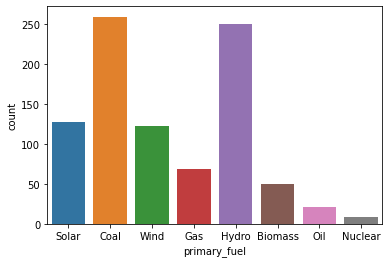

In [6]:
ax=sns.countplot(x='primary_fuel',data=cat)
print(cat["primary_fuel"].value_counts())

In [108]:
#we can see coal and hydro have the most count

Oil             905
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


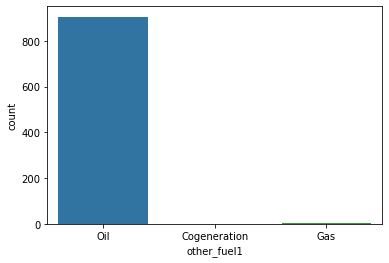

In [109]:
ax=sns.countplot(x='other_fuel1',data=cat)
print(cat["other_fuel1"].value_counts())

In [110]:
#we can see oil is themost

In [111]:

en=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=en.fit_transform(df[i].values.reshape(-1,1))
    
    

C:\Users\91954\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [112]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,6,2,62.985490,41.025840,17.404540,24.725750,22.721820
1,98.0,24.7663,74.6090,1,2,313.669770,313.626038,260.118900,237.914450,126.341176
2,39.2,21.9038,69.3732,7,2,129.998892,105.342640,121.790067,103.159610,114.663800
3,135.0,23.8712,91.3602,2,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,1,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,1,2,5296.394070,4417.618100,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,6,2,62.985490,41.025840,17.404540,24.725750,22.721820
905,25.5,15.2758,75.5811,7,2,62.985490,41.025840,13.434490,24.725750,24.813310
906,80.0,24.3500,73.7477,1,2,290.221600,246.535130,252.375780,249.532070,298.034340


In [113]:
Y=df['capacity_mw']
X=df.drop(columns = ['capacity_mw'])

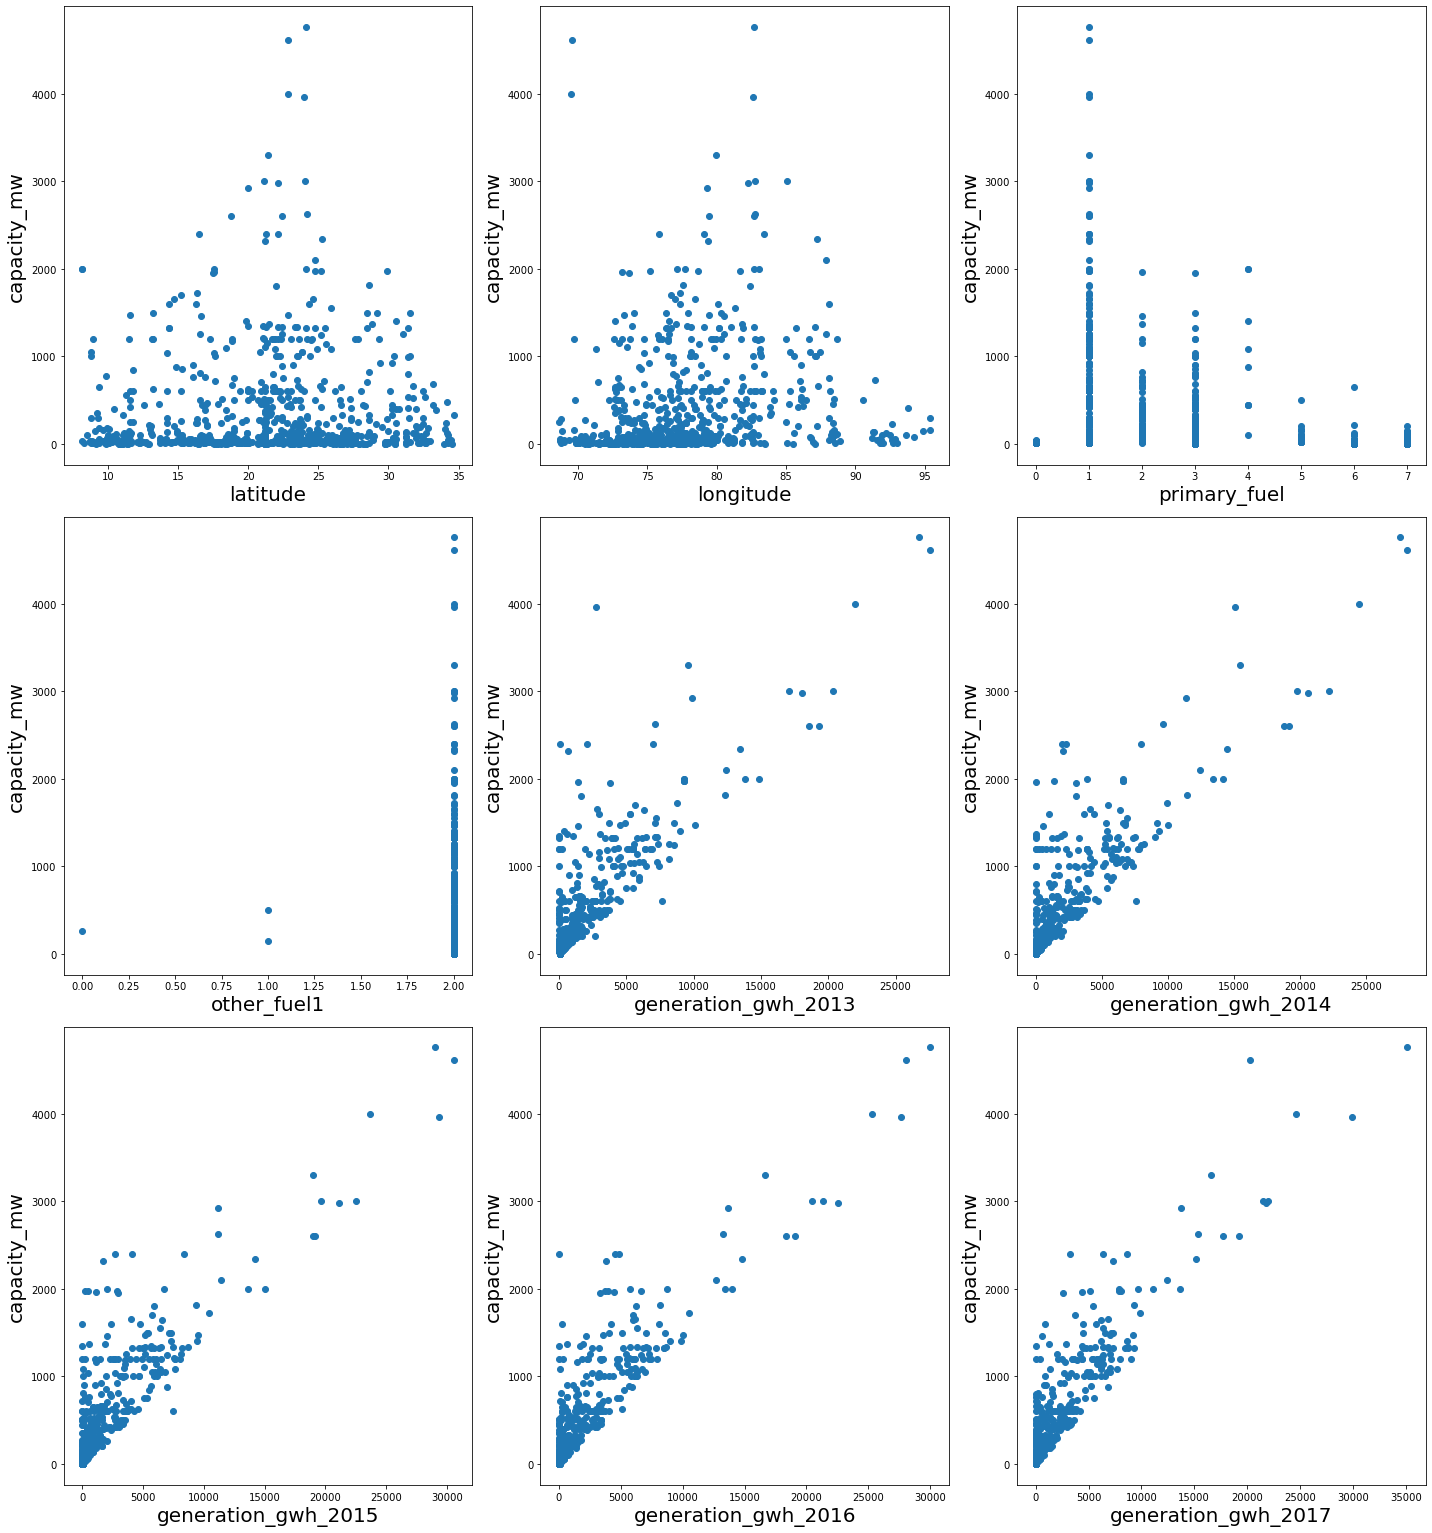

In [114]:
plt.figure(figsize=(20,35),facecolor='white')
plotnumber = 1

for  column in X:
    if plotnumber<=12:
        ax=plt.subplot(5,3,plotnumber)
        plt.scatter(df[column],Y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('capacity_mw',fontsize=20)
         
    plotnumber+=1
plt.tight_layout()

In [115]:
#we can see latitude and longitude are marginally normally distributed
#every generation is somehow going towards normally distributed plot

In [116]:
y=df['primary_fuel']
x=df.drop(columns = ['primary_fuel'])

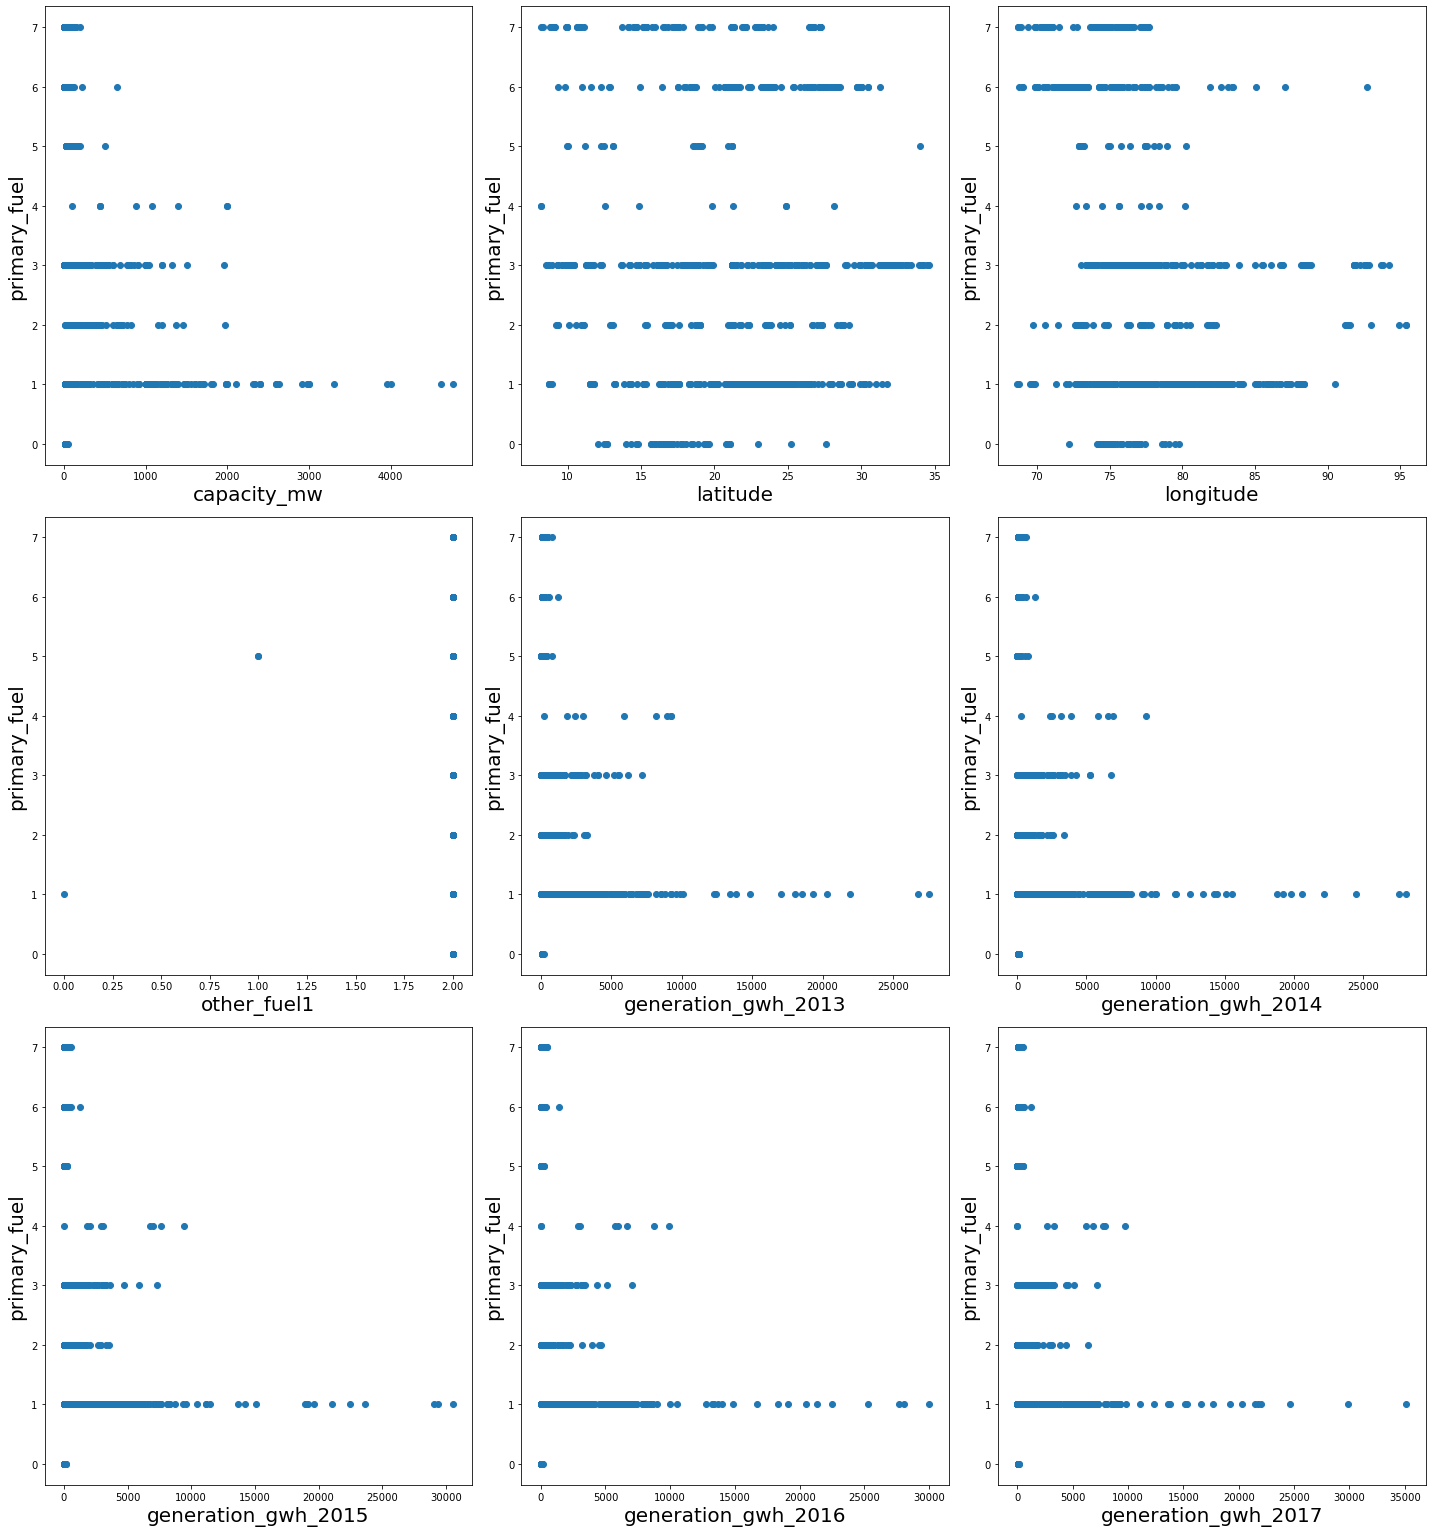

In [117]:
plt.figure(figsize=(20,35),facecolor='white')
plotnumber = 1

for  column in x:
    if plotnumber<=12:
        ax=plt.subplot(5,3,plotnumber)
        plt.scatter(df[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('primary_fuel',fontsize=20)
         
    plotnumber+=1
plt.tight_layout()

In [118]:
#we canot interpret much from this relationship

In [119]:
copy.primary_fuel.unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

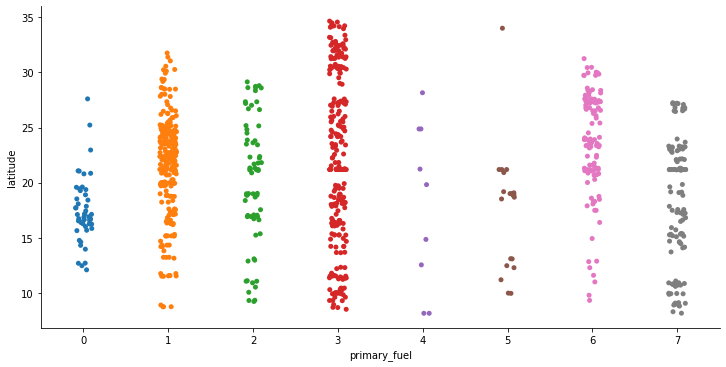

In [120]:
sns.catplot(x='primary_fuel',y='latitude',data=df,aspect=2)


In [121]:
#we can see that gas  shows the most relationship with latitude

In [122]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017'],
      dtype='object')

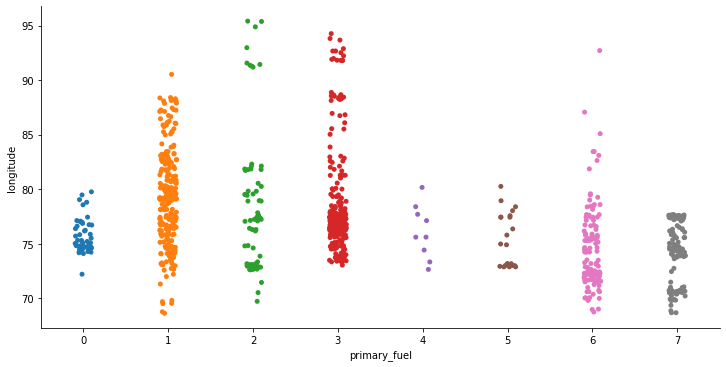

In [123]:
sns.catplot(x='primary_fuel',y='longitude',data=df,aspect=2)


In [124]:
#we can see that gas   shows the most relationship with longitude but wind also has some good relationship but it shows some relationship

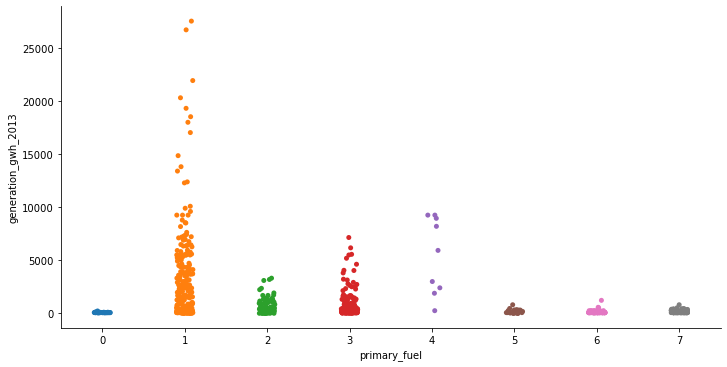

In [125]:
sns.catplot(x='primary_fuel',y='generation_gwh_2013',data=df,aspect=2)


In [126]:
#we can see coal is generating most in 2013

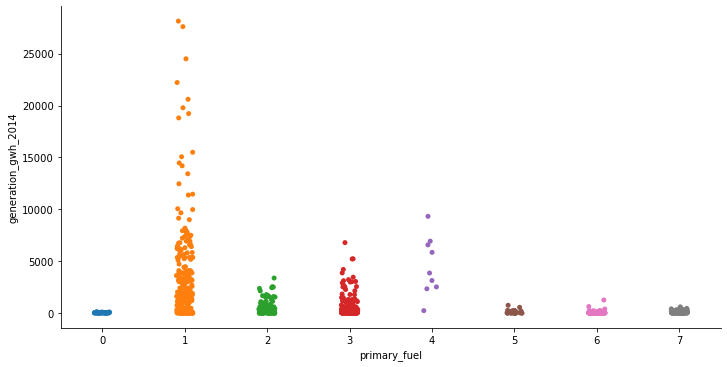

In [127]:
sns.catplot(x='primary_fuel',y='generation_gwh_2014',data=df,aspect=2)

In [128]:
#we can see coal is generating most in 2014

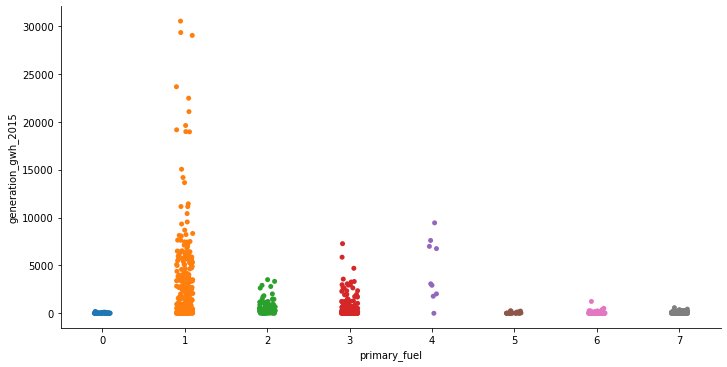

In [129]:
sns.catplot(x='primary_fuel',y='generation_gwh_2015',data=df,aspect=2)

In [130]:
#we can see coal is generating most in 2015

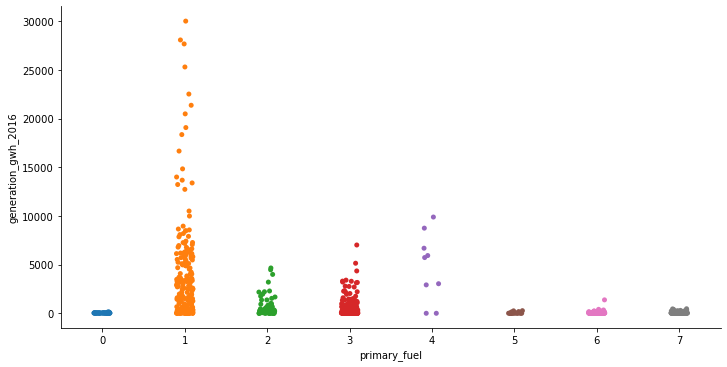

In [131]:
sns.catplot(x='primary_fuel',y='generation_gwh_2016',data=df,aspect=2)

In [132]:
#we can see coal is generating most in 2016

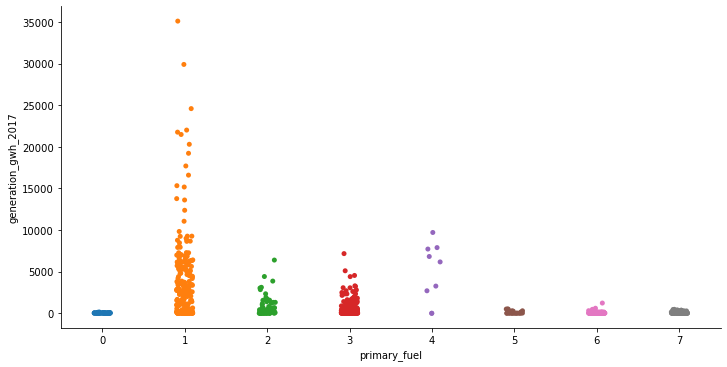

In [133]:
sns.catplot(x='primary_fuel',y='generation_gwh_2017',data=df,aspect=2)

In [134]:
#we can see coal is generating most in 2017

C:\Users\91954\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91954\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91954\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

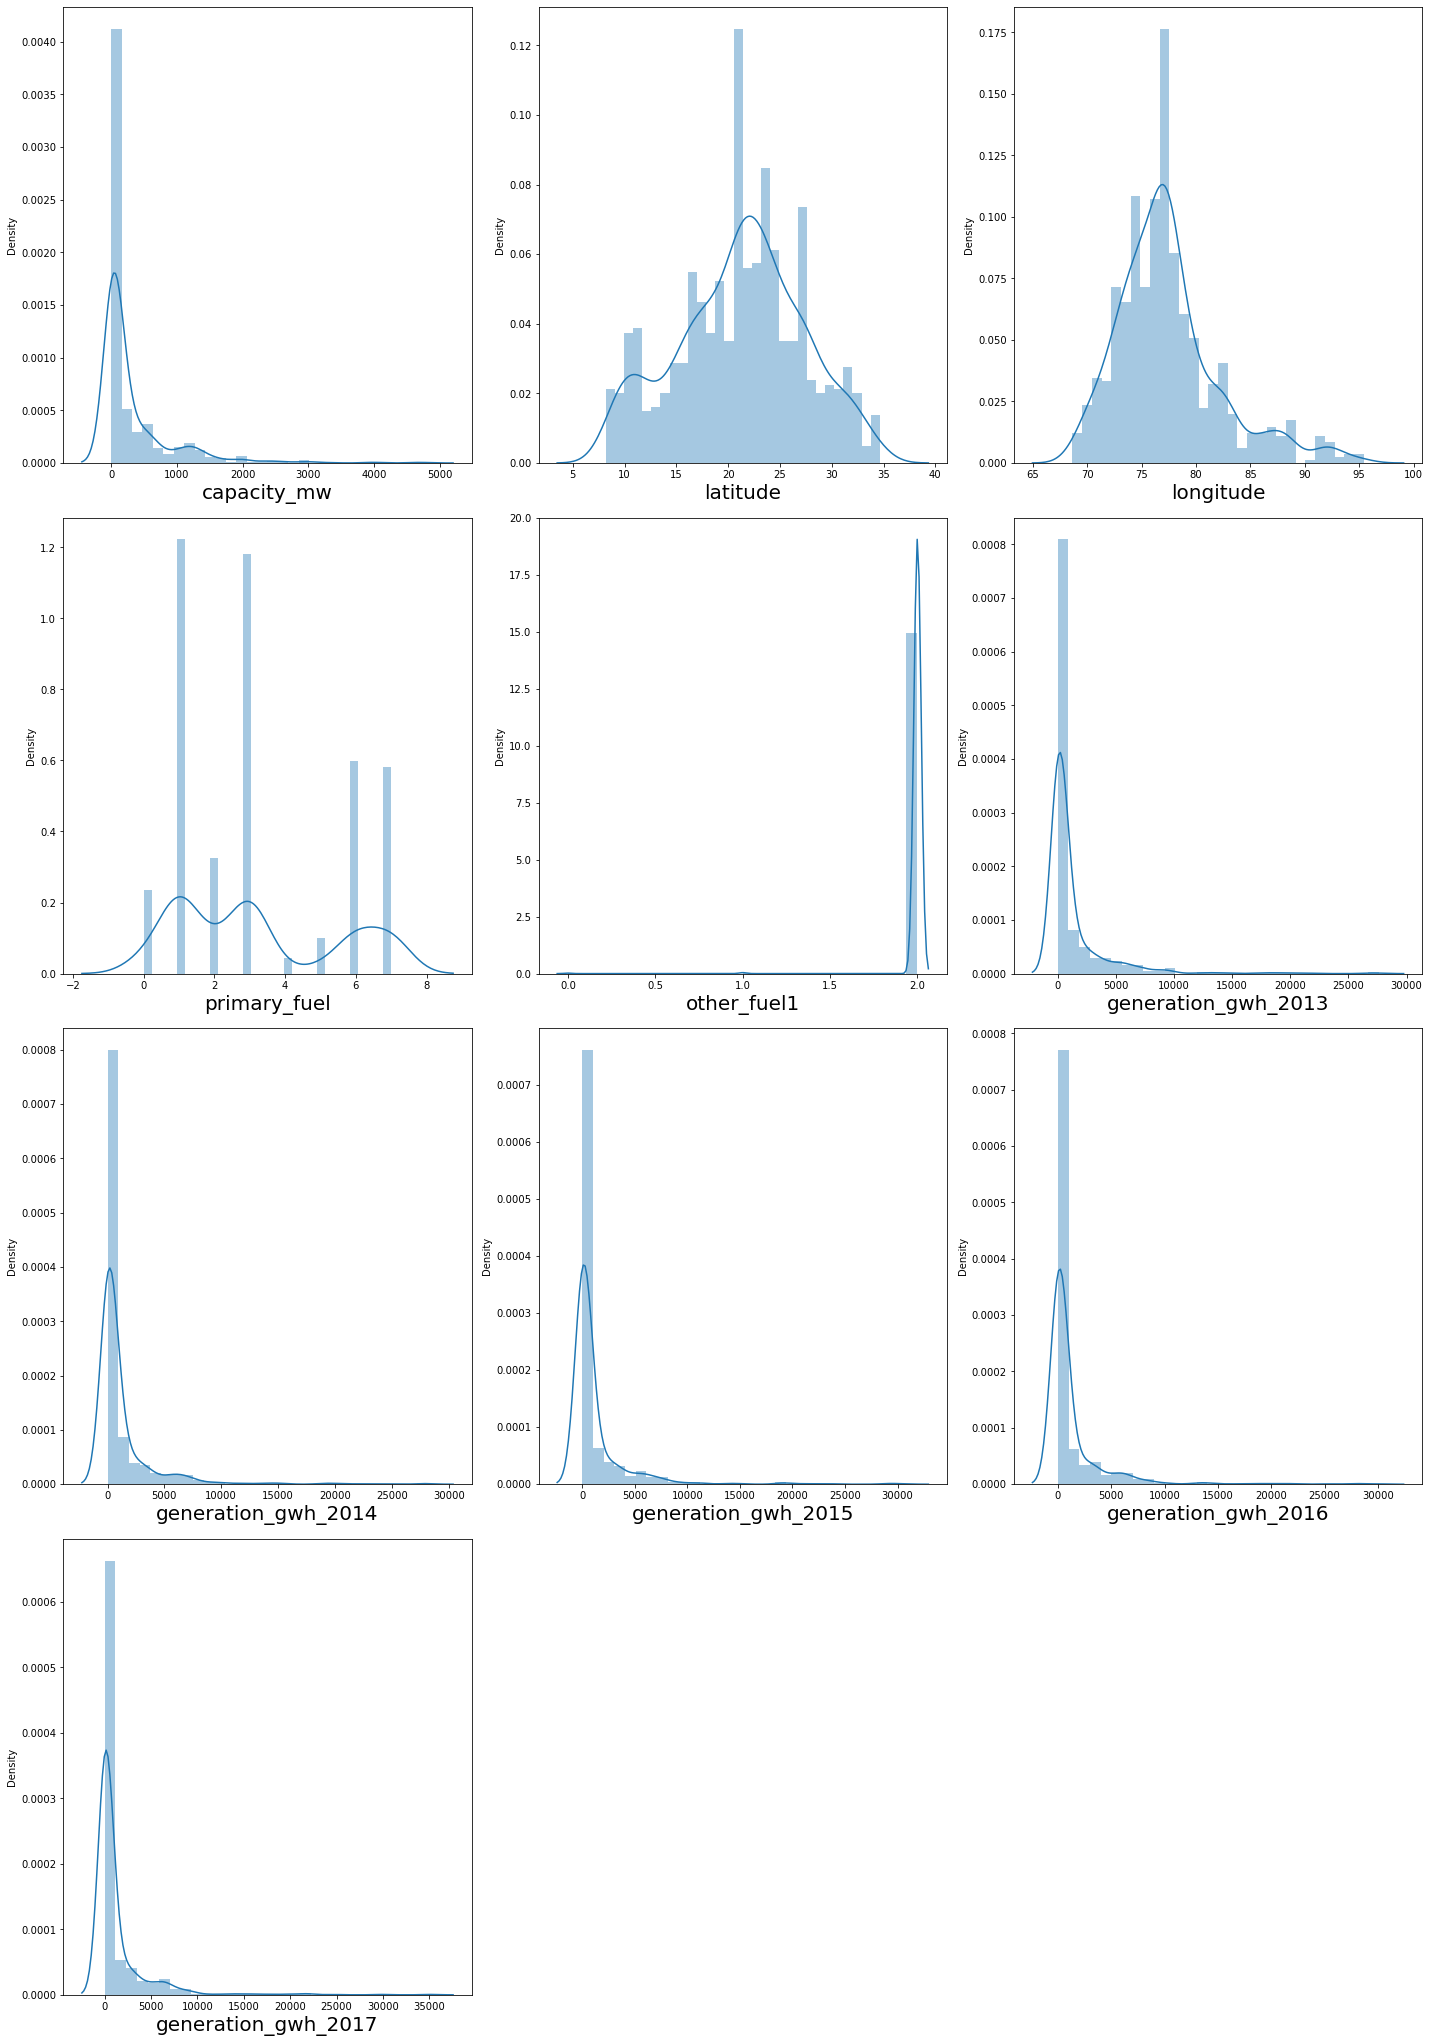

In [135]:
plt.figure(figsize=(20,35),facecolor='white')
plotnumber = 1

for  column in df:
    if plotnumber<=10:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(df[column],bins=30)
        plt.xlabel(column,fontsize=20)
       
    plotnumber+=1
plt.tight_layout()

In [136]:
#we can see rightskewness in capacity,longitude,generation13,14,15,16,17
#and left skewness in latitude

In [137]:
df.corr()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
capacity_mw,1.000000,0.049790,0.197124,-0.377783,0.002672,0.863069,0.872835,0.873152,0.894972,0.908897
latitude,0.049790,1.000000,0.031501,-0.013453,0.036606,0.043966,0.058991,0.052647,0.048678,0.058845
longitude,0.197124,0.031501,1.000000,-0.348710,0.030297,0.170230,0.162829,0.161358,0.183012,0.195250
primary_fuel,-0.377783,-0.013453,-0.348710,1.000000,0.004902,-0.311976,-0.308333,-0.296118,-0.303473,-0.309017
other_fuel1,0.002672,0.036606,0.030297,0.004902,1.000000,0.002316,0.000089,0.003462,0.007836,0.007807
generation_gwh_2013,0.863069,0.043966,0.170230,-0.311976,0.002316,1.000000,0.952703,0.892255,0.893543,0.875841
generation_gwh_2014,0.872835,0.058991,0.162829,-0.308333,0.000089,0.952703,1.000000,0.953667,0.934783,0.919053
generation_gwh_2015,0.873152,0.052647,0.161358,-0.296118,0.003462,0.892255,0.953667,1.000000,0.973342,0.946422
generation_gwh_2016,0.894972,0.048678,0.183012,-0.303473,0.007836,0.893543,0.934783,0.973342,1.000000,0.975548
generation_gwh_2017,0.908897,0.058845,0.195250,-0.309017,0.007807,0.875841,0.919053,0.946422,0.975548,1.000000


<AxesSubplot:>

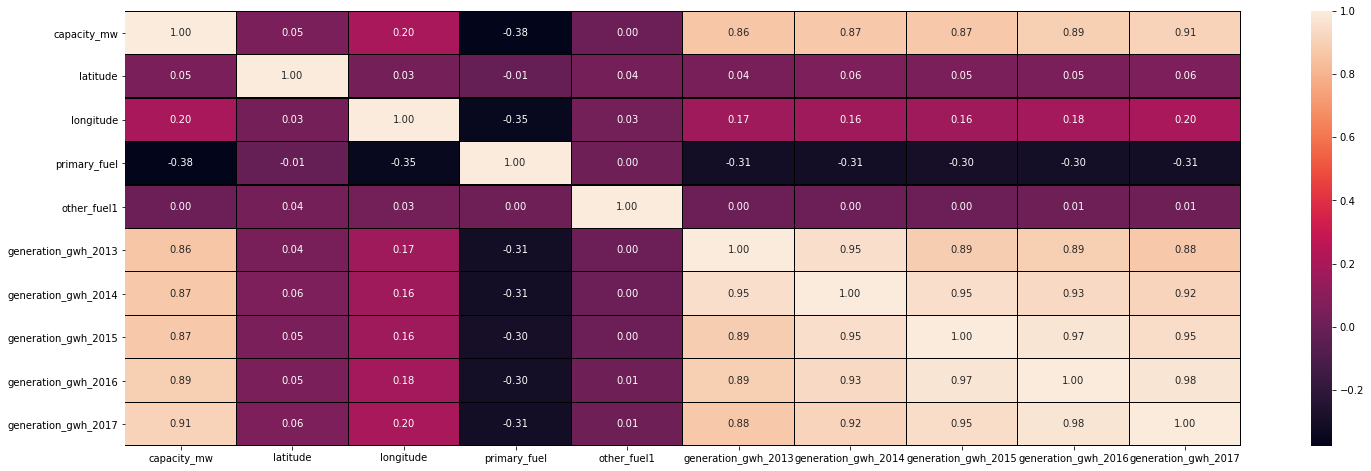

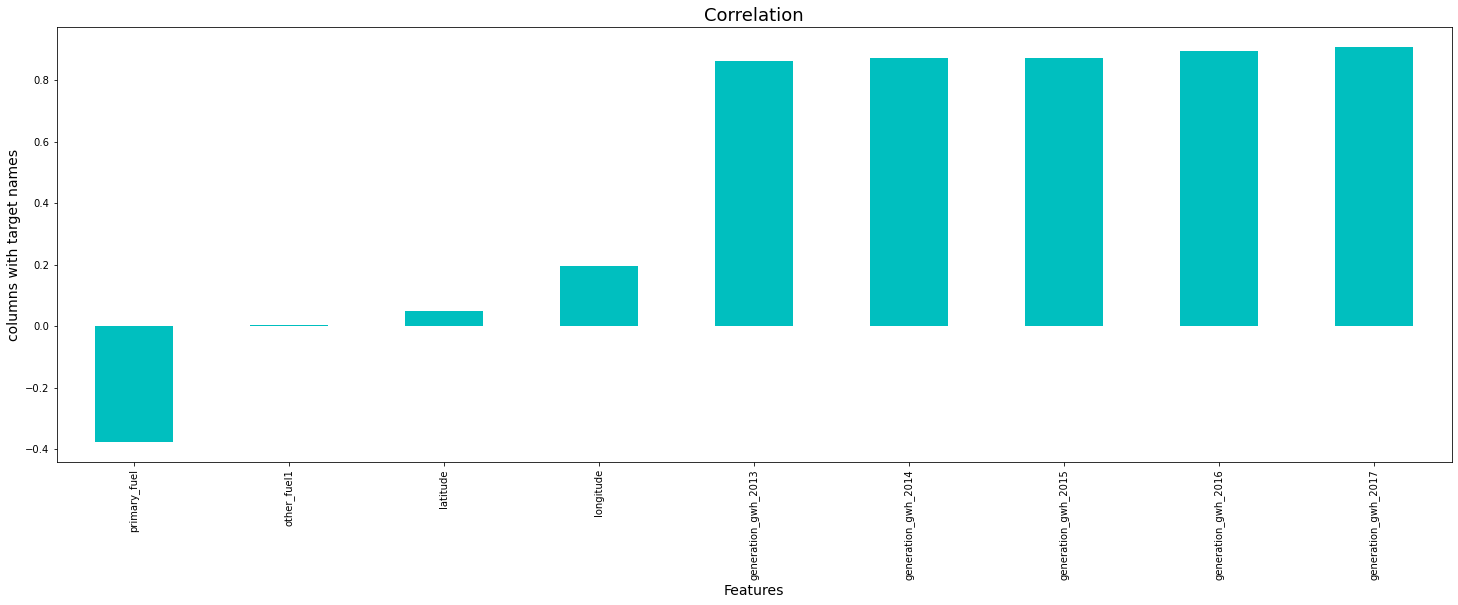

In [139]:
plt.figure(figsize=(25,8))
df.corr()['capacity_mw'].sort_values(ascending=True).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

In [140]:
#we can see capacity has the best relation ship generations
# we can also see that generations are highly correlated with each other
#but here it is normal as every year if the consumption are same then most probably the the total generation can be mostly same
#we can also see that power fuel doesnt have much corr with any of ther columns

In [141]:
df.skew()

capacity_mw             3.193257
latitude               -0.147391
longitude               1.129836
primary_fuel            0.471141
other_fuel1           -20.464435
generation_gwh_2013     4.578025
generation_gwh_2014     4.792192
generation_gwh_2015     5.197543
generation_gwh_2016     4.969794
generation_gwh_2017     4.966130
dtype: float64

In [142]:
#We can see skewness in most of the column

In [143]:
llt=df

In [144]:
df_new=power_transform(df)


df=pd.DataFrame(df_new,columns=df.columns)


C:\Users\91954\anaconda3\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\91954\anaconda3\lib\site-packages\numpy\core\_methods.py:243: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [145]:
df.skew()

capacity_mw             0.020461
latitude               -0.074872
longitude               0.002419
primary_fuel           -0.047088
other_fuel1           -17.339637
generation_gwh_2013     0.000410
generation_gwh_2014    -0.000121
generation_gwh_2015     0.019759
generation_gwh_2016     0.007138
generation_gwh_2017     0.005511
dtype: float64

In [146]:
df.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel           float64
other_fuel1            float64
generation_gwh_2013    float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
dtype: object

In [147]:
llt.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel             int32
other_fuel1              int32
generation_gwh_2013    float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
dtype: object

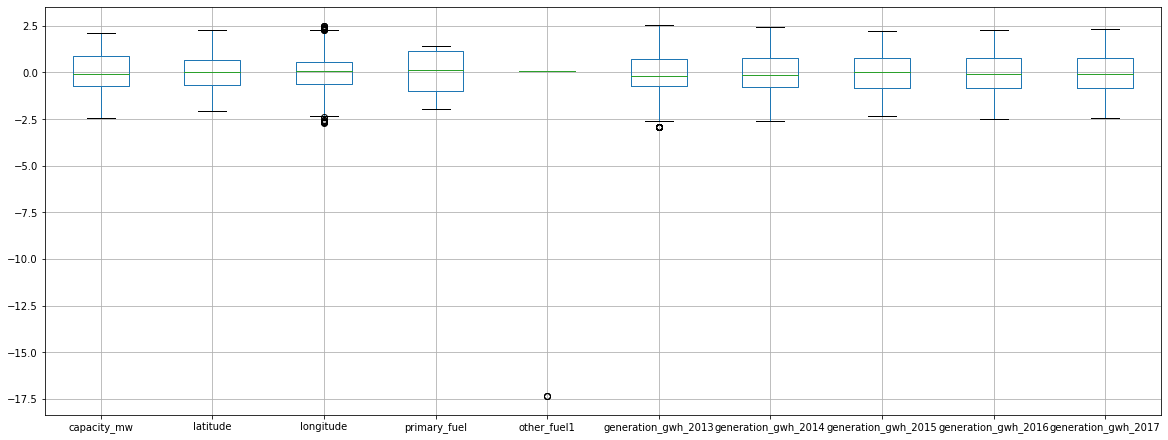

In [148]:
df.iloc[:,0:].boxplot(figsize=[20,9])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [149]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([812, 814, 818], dtype=int64), array([4, 4, 4], dtype=int64))

In [150]:
X=df.drop("capacity_mw",axis=1)
Y=df['capacity_mw']

In [151]:
sc=StandardScaler()# standerdizing the data
X=sc.fit_transform(X)
X

array([[ 1.1576201 , -0.95320834,  1.17102468, ..., -0.86193331,
        -0.81465183, -0.85895139],
       [ 0.57869844, -0.54510296, -0.99559029, ...,  0.33057646,
         0.2381989 , -0.07494918],
       [ 0.10056251, -2.38029747,  1.44103901, ...,  0.00324175,
        -0.14457212, -0.11894763],
       ...,
       [-0.97864674, -0.28043347,  1.44103901, ..., -0.97717409,
        -0.81465183, -0.81874833],
       [ 0.50876248, -0.79686754, -0.99559029, ...,  0.31769205,
         0.25976152,  0.31101498],
       [-1.81231315,  0.18251185,  1.44103901, ..., -0.97717409,
        -0.81465183, -0.76043155]])

In [152]:
lr=LinearRegression()
for i in range(0,1000):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=i)
    lr.fit(X_train,Y_train)
    pred_train=lr.predict(X_train)
    pred_test=lr.predict(X_test)
    print(f"At random state{i},the training accuracy is :- {r2_score(Y_train,pred_train)}")
    print(f"At random state{i},the testing  accuracy is :- {r2_score(Y_test,pred_test)}")
    print('\n')

At random state0,the training accuracy is :- 0.6858685902459839
At random state0,the testing  accuracy is :- 0.6735707405143628


At random state1,the training accuracy is :- 0.6986671280035426
At random state1,the testing  accuracy is :- 0.6521430255642066


At random state2,the training accuracy is :- 0.6636829213233055
At random state2,the testing  accuracy is :- 0.7076773580941003


At random state3,the training accuracy is :- 0.6957456381181993
At random state3,the testing  accuracy is :- 0.6531849469777924


At random state4,the training accuracy is :- 0.7086014210793787
At random state4,the testing  accuracy is :- 0.6389267508140171


At random state5,the training accuracy is :- 0.6574558834771811
At random state5,the testing  accuracy is :- 0.7006744837711996


At random state6,the training accuracy is :- 0.7319313869941653
At random state6,the testing  accuracy is :- 0.553958406699763


At random state7,the training accuracy is :- 0.7108311224915148
At random state7,the testin

In [153]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=23)

In [154]:
lr.fit(X_train,Y_train)

LinearRegression()

In [155]:
pred_test=lr.predict(X_test)
print(r2_score(Y_test,pred_test))

0.6810433029348796


In [156]:
Train_accuracy=r2_score(Y_train,pred_train)
Test_accuracy=r2_score(Y_test,pred_test)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,X,Y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is {Test_accuracy}")
    print('\n')
    

At cross fold 2 the cv score is 0.6657606748156103 and accuracy score for training is -0.5391862199325852 and accuracy score for testing is 0.6810433029348796


At cross fold 3 the cv score is 0.6669078951484111 and accuracy score for training is -0.5391862199325852 and accuracy score for testing is 0.6810433029348796


At cross fold 4 the cv score is 0.6681442158847665 and accuracy score for training is -0.5391862199325852 and accuracy score for testing is 0.6810433029348796


At cross fold 5 the cv score is 0.6651850141517969 and accuracy score for training is -0.5391862199325852 and accuracy score for testing is 0.6810433029348796


At cross fold 6 the cv score is 0.664519824036079 and accuracy score for training is -0.5391862199325852 and accuracy score for testing is 0.6810433029348796


At cross fold 7 the cv score is 0.6510239646928205 and accuracy score for training is -0.5391862199325852 and accuracy score for testing is 0.6810433029348796


At cross fold 8 the cv score is 0.6

In [157]:
#as the cv score  impacted the training accuracy  we are taking cv =6

In [158]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
X_new = SelectKBest( f_regression,k=5).fit_transform(X, Y)
X_new

array([[-0.73052577, -0.76027533, -0.86193331, -0.81465183, -0.85895139],
       [ 0.12337236,  0.23014577,  0.33057646,  0.2381989 , -0.07494918],
       [-0.34660723, -0.3027141 ,  0.00324175, -0.14457212, -0.11894763],
       ...,
       [-0.73052577, -0.76027533, -0.97717409, -0.81465183, -0.81874833],
       [ 0.08182212,  0.11249234,  0.31769205,  0.25976152,  0.31101498],
       [-0.73052577, -0.76027533, -0.97717409, -0.81465183, -0.76043155]])

In [159]:
len(X_new)

908

In [160]:
#we can see all the data r best

In [161]:
#regularization

In [162]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters={"alpha":[.0001,.001,.01,.1,1,10],'random_state':list(range(0,30)),'selection':['cyclic', 'random']}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)



{'alpha': 0.01, 'random_state': 7, 'selection': 'random'}


In [163]:
ls=Lasso(alpha=0.01,random_state=7,selection='random')
ls.fit(X_train,Y_train)
ls.score(X_train,Y_train)
pred_ls=ls.predict(X_test)
lss=r2_score(Y_test,pred_ls)
lss

0.680018361181319

In [164]:
cv_score=cross_val_score(ls,X,Y,cv=6)
cv_mean=cv_score.mean()
cv_mean

0.6636715254555005

In [165]:
from sklearn.linear_model import Ridge
parameters={"alpha":[.0001,.001,.01,.1,1,10],'random_state':list(range(10,40)),'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
rs=Ridge()
clf=GridSearchCV(rs,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)


{'alpha': 10, 'random_state': 37, 'solver': 'sag'}


In [166]:
rs=Ridge(alpha=10,random_state=37,solver='sag')
rs.fit(X_train,Y_train)
rs.score(X_train,Y_train)
pred_rs=rs.predict(X_test)
rss=r2_score(Y_test,pred_ls)
rss

0.680018361181319

In [167]:
#we can see that regularisation   doesn'timprovesthe r2_score

In [168]:
#ensemble techniques

In [169]:
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'sqrt'}


In [170]:
rf=RandomForestRegressor(criterion='mae',max_features='log2')
rf.fit(X_train,Y_train)
rf.score(X_train,Y_train)
pred_decision=rf.predict(X_test)
rfs=r2_score(Y_test,pred_decision)
print('r2_score:',rfs*100)
rfscore=cross_val_score(rf,X,Y,cv=6)
rfc=rfscore.mean()
print('cross_val_score:',rfc*100)

r2_score: 94.95556912207832
cross_val_score: 94.84259953656405


In [171]:
# we can see that the r2 score is improving 

In [172]:
#knn model

In [173]:
from sklearn.neighbors import KNeighborsRegressor
parameters={'n_neighbors':[1,2,3,4,5],'algorithm':[ 'kd_tree', 'brute'],'leaf_size':[10,15,20,25,30,35]}
kn=KNeighborsRegressor()
clf=GridSearchCV(kn,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'algorithm': 'kd_tree', 'leaf_size': 30, 'n_neighbors': 3}


In [174]:
kn= KNeighborsRegressor(n_neighbors=3,algorithm='kd_tree',leaf_size=30)
kn.fit(X_train,Y_train)
kn.score(X_train,Y_train)
pred_decision=kn.predict(X_test)
knn=r2_score(Y_test,pred_decision)
print('r2_score:',knn*100)
knscore=cross_val_score(kn,X,Y,cv=6)
knc=knscore.mean()
print('cross_val_score:',knc*100)

r2_score: 88.02733153354853
cross_val_score: 88.5079080005213


In [175]:
#knn is also giving more score than linera model .

In [176]:
from sklearn.ensemble import BaggingRegressor
parameters={'max_features':[1,2,3],'random_state':list(range(0,10))}
bg=BaggingRegressor()
clf=GridSearchCV(bg,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'max_features': 3, 'random_state': 4}


In [177]:
bg=BaggingRegressor(max_features=3,random_state=8)
bg.fit(X_train,Y_train)
bg.score(X_train,Y_train)
pred_decision=bg.predict(X_test)
bgg=r2_score(Y_test,pred_decision)
print('r2_score:',bgg*100)
bgscore=cross_val_score(bg,X,Y,cv=6)
bgc=bgscore.mean()
print('cross_val_score:',bgc*100)

r2_score: 92.73965884244313
cross_val_score: 91.38751603339573


In [178]:
from sklearn.tree import DecisionTreeRegressor

parameters={'criterion':['mse','friedman_mse','mae','poisson'],'splitter':['best','random'],'max_features':["auto", "sqrt", "log2"]}
                                                                                                                 
dt=DecisionTreeRegressor()
clf=GridSearchCV(dt,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto', 'splitter': 'random'}


C:\Users\91954\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91954\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91954\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\91954\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 168, in fit
    raise ValueError("Some value(s) of y are negative which is"
ValueError: Some value(s) of y are negative which is not allowed for Poisson regression.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91954\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this tr

In [179]:
dt=DecisionTreeRegressor(criterion="mse",splitter="best",max_features="auto")
dt.fit(X_train,Y_train)
dt.score(X_train,Y_train)
pred_decision=dt.predict(X_test)
dtt=r2_score(Y_test,pred_decision)
print('r2_score:',dtt*100)
dtscore=cross_val_score(dt,X,Y,cv=6)
dtc=dtscore.mean()
print('cross_val_score:',dtc*100)

r2_score: 90.16154880161761
cross_val_score: 88.62580246822085


In [180]:
r2_score= {
    'model':['linear regression', 'random forest','KNeighborsRegressor','bagging','decisiontree'],
    'R2score':[66.36715254555005,94.8732041482261,88.02733153354853,92.73965884244313 ,90.45776308101043 ]
}
r2_Score=pd.DataFrame(data=r2_score)
r2_Score.sort_values(by=['R2score'], ascending=False)

,model,R2score
1,random forest,94.873204
3,bagging,92.739659
4,decisiontree,90.457763
2,KNeighborsRegressor,88.027332
0,linear regression,66.367153


In [181]:
#we conclude random forent has the best model 

In [182]:
filename='global_plantcapa.pkl'
pickle.dump(rf,open(filename,'wb'))

In [183]:
loaded_model=pickle.load(open('global_plantcapa.pkl','rb'))
result=loaded_model.score(X_test,Y_test)
print(result)

0.9495556912207832


In [184]:
conclusion=pd.DataFrame([loaded_model.predict(X_test)[:],pred_decision[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,354,355,356,357,358,359,360,361,362,363
Predicted,-1.793856,0.350563,-0.670027,-0.689725,0.857396,-1.427855,-1.067645,1.491508,1.100103,0.377142,...,1.461663,0.510375,0.862968,-0.885328,0.557751,0.385085,1.324419,-0.438118,1.482431,-0.140699
Original,-1.740165,0.625530,-0.536218,-0.604778,1.051040,-1.375964,-0.488990,1.312312,1.031377,1.046199,...,1.375096,0.625530,1.246436,-0.488990,0.228833,0.253287,1.464167,-0.438376,1.375096,-0.284096


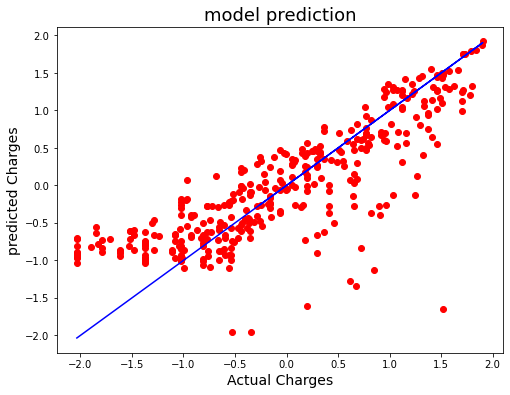

In [185]:
plt.figure(figsize=(8,6))
plt.scatter(x=Y_test,y=pred_test,color='r')
plt.plot(Y_test,Y_test,color='b')
plt.xlabel('Actual Charges',fontsize=14)
plt.ylabel('predicted Charges',fontsize=14)
plt.title('model prediction',fontsize=18)
plt.show()

In [186]:
#so this is the predicted  capacity

In [187]:
x=df.drop("primary_fuel",axis=1)
y=df['primary_fuel']

In [188]:
y=y.astype(int)
y.dtypes

dtype('int32')

In [189]:
sc=StandardScaler()# standerdizing the data
x=sc.fit_transform(x)
x

array([[-1.69572306,  1.1576201 , -0.95320834, ..., -0.86193331,
        -0.81465183, -0.85895139],
       [ 0.19251108,  0.57869844, -0.54510296, ...,  0.33057646,
         0.2381989 , -0.07494918],
       [-0.29492012,  0.10056251, -2.38029747, ...,  0.00324175,
        -0.14457212, -0.11894763],
       ...,
       [-0.52559321, -0.97864674, -0.28043347, ..., -0.97717409,
        -0.81465183, -0.81874833],
       [ 0.08531829,  0.50876248, -0.79686754, ...,  0.31769205,
         0.25976152,  0.31101498],
       [-0.75867669, -1.81231315,  0.18251185, ..., -0.97717409,
        -0.81465183, -0.76043155]])

In [190]:
#as the cv score  impacted the training accuracy  we are taking cv =6

In [191]:
from sklearn.neighbors import KNeighborsClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=i)
parameters={'n_neighbors':[1,2,3,4,5],'algorithm':[ 'kd_tree', 'brute','ball_tree'],'leaf_size':[10,15,20,25,30,35]}
kn=KNeighborsClassifier()
clf=GridSearchCV(kn,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_neighbors': 2}


In [192]:
kn= KNeighborsClassifier(n_neighbors=1,algorithm='kd_tree',leaf_size=10)
kn.fit(x_train,y_train)
kn.score(x_train,y_train)
pred_decision=kn.predict(x_test)
knn=accuracy_score(y_test,pred_decision)
print('accuracy_score:',knn*100)
knscore=cross_val_score(kn,x,y,cv=6)
knc=knscore.mean()
print('cross_val_score:',knc*100)

accuracy_score: 84.61538461538461
cross_val_score: 85.57061113047519


In [193]:
#we can see th score

In [194]:
y_pred_kn = kn.predict(x_test)
print("KNeighborsClassifier report: \n\n", classification_report(y_test, y_pred_kn))

KNeighborsClassifier report: 

               precision    recall  f1-score   support

          -1       0.30      0.39      0.34        18
           0       0.90      0.91      0.91       245
           1       0.84      0.76      0.80       101

    accuracy                           0.85       364
   macro avg       0.68      0.69      0.68       364
weighted avg       0.85      0.85      0.85       364



In [195]:
from sklearn.ensemble import RandomForestClassifier
parameters={'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2']}
rf=RandomForestClassifier()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'entropy', 'max_features': 'auto'}


In [196]:
rf=RandomForestClassifier(criterion='entropy',max_features='log2')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
rfs=accuracy_score(y_test,pred_decision)
print('accuracy_score:',rfs*100)
rfscore=cross_val_score(rf,x,y,cv=6)
rfc=rfscore.mean()
print('cross_val_score:',rfc*100)

accuracy_score: 85.98901098901099
cross_val_score: 86.01211223422794


In [218]:
y_pred_rf = rf.predict(x_test)
print("RandomRainforestClassifier report: \n\n", classification_report(y_test, y_pred_rf))

RandomRainforestClassifier report: 

               precision    recall  f1-score   support

          -1       0.39      0.39      0.39        18
           0       0.88      0.95      0.92       245
           1       0.89      0.72      0.80       101

    accuracy                           0.86       364
   macro avg       0.72      0.69      0.70       364
weighted avg       0.86      0.86      0.86       364



In [198]:
from sklearn.tree import DecisionTreeClassifier


parameters={'criterion':["gini", "entropy"],'splitter':['best','random'],'max_features':["auto", "sqrt", "log2"]}
                                                                                                                 
dt=DecisionTreeClassifier()
clf=GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'entropy', 'max_features': 'log2', 'splitter': 'best'}


In [199]:
dt=DecisionTreeClassifier(criterion='gini',max_features='log2',splitter='random')
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_decision=dt.predict(x_test)
dts=accuracy_score(y_test,pred_decision)
print('accuracy_score:',dts*100)
dtscore=cross_val_score(dt,x,y,cv=6)
dtc=dtscore.mean()
print('cross_val_score:',dtc*100)

accuracy_score: 79.3956043956044
cross_val_score: 80.05765655861508


In [200]:
y_pred_dt = dt.predict(x_test)
print("DecisionTreeClassifier report: \n\n", classification_report(y_test, y_pred_dt))

DecisionTreeClassifier report: 

               precision    recall  f1-score   support

          -1       0.00      0.00      0.00        18
           0       0.68      0.82      0.74       245
           1       0.36      0.21      0.26       101

    accuracy                           0.61       364
   macro avg       0.35      0.34      0.34       364
weighted avg       0.56      0.61      0.57       364



In [201]:
#as we can see randomrainforest is giving the best score

In [202]:
filename='global_plantfuel.pkl'
pickle.dump(rf,open(filename,'wb'))

In [203]:
loaded_model=pickle.load(open('global_plantfuel.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.8598901098901099


In [204]:
conclusion=pd.DataFrame([loaded_model.predict(X_test)[:],pred_decision[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,354,355,356,357,358,359,360,361,362,363
Predicted,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Original,-1,1,0,-1,0,0,0,1,0,1,...,0,1,-1,0,0,1,1,1,0,0


In [ ]:
#this is the model